In [44]:
library(ggplot2)

**Gaia Volpi, ID = 2107759**
## Esercizio 1

A well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease. A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of n = 75 patients known to have the disease is screened using the new method.

1) What is the probability distribution of y, the number of times the new method fails to detect the
disease ?

**sbagliato**
We assume the probability of failing the detection for the new method to be similar to the established one. The distribution of y folows a binomial distribution with n = 75 and p = 0.15.


**correction**
Let $p=\dfrac{y}{n}$ the probability of getting a false negative, the related distribution for y is binomial.


2) On the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is
the frequentist estimator of the failure probability of the new method?

For a binomial distibution the frequentist estimator is defined as $\hat{p} = \frac{y}{n}$ and $\sigma_{\hat{p}}=\sqrt{\dfrac{\hat{p}(1-\hat{p})}{n}}$.

In [2]:
y = 6
n = 75
p = y/n
sigma = sqrt(p*(1-p)/n)

cat(sprintf('Failure probability: %.2f +- %.2f', p, sigma))

Failure probability: 0.08 +- 0.03

3) Setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot the mean value and variance.

We assume as prior a beta distribution with $\alpha_{p} = \mu\cdot(\dfrac{\mu\cdot(1-\mu)}{\sigma^2}-1)$ and $\beta_{p} = \alpha\cdot(\dfrac{1-\mu}{\mu})$. 

The posterior distribution is then another beta distribution with parameters $\alpha = \alpha_{p}+y$ and $\beta = \beta_{p}+n-y$.

Mean: 0.084787, Variance: 0.000952

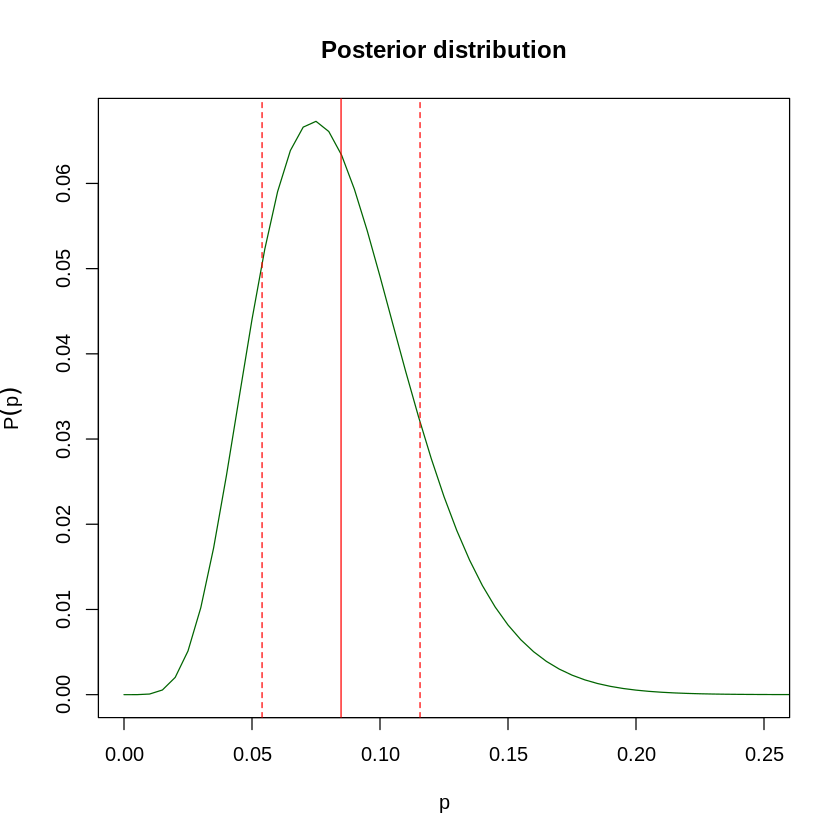

In [2]:
y = 6
n = 75
mu = 0.15
sigma = 0.14
p = seq(0, 1, length.out = 201)

alpha.p = mu*(mu*(1-mu)/sigma^2-1)
beta.p = alpha.p*(1-mu)/mu

alpha = alpha.p+y
beta = beta.p+n-y
p.star = dbeta(p, shape1=alpha, shape2=beta)
p.post = p.star / sum(p.star)

mean = sum(p*p.post)
var = sum(p^2*p.post) - mean^2
cat(sprintf("Mean: %f, Variance: %f", mean, var))

plot(p, p.post, type='l', xlab="p", ylab=expression(P(p)), main="Posterior distribution", xlim=c(0.0, 0.25), col='dark green')
abline(v=mean, col='red',lty=1)
abline(v=mean+sqrt(var), col='red',lty=2)
abline(v=mean-sqrt(var), col='red',lty=2)

4) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way.

In [4]:
p0 = 0.15
p.H0 = 1 - pbeta(p0, shape1=alpha, shape2=beta) 
cat(sprintf("Posterior probability of the null hypotesis: %f", p.H0))

Posterior probability of the null hypotesis: 0.031279

As seen as the posterior probability of the null hypotesis is smaller than the level of significance $\alpha$, we accept the null hypostesis.

5) Perform the same hypothesis test in the classical frequentist way.

The null distribution is a binomial distribution with n=75 and p=0.15, let's calulate the p-value:

In [14]:
p.value = dbinom(6, n, p0)
sig = 0.05
cat(sprintf("P-value: %f", p.value))

P-value: 0.030933

As seen as the p-value is smaller than the level of significance, we accept the null hypotesis.

## Esercizio 2

A researcher has collected n = 16 observations that are supposed to come from a Normal distribution with known variance $\sigma^{2}$=4: 

4.09, 4.68, 1.87, 2.62, 5.58, 8.68, 4.07, 4.78, 4.79, 4.49, 5.85, 5.09, 2.40, 6.27, 6.30, 4.47.

Assuming the prior is a step funtion:

g(µ) = µ for 0 < µ ≤ 3 ,

g(µ) = 3 for 3 < µ ≤ 5 ,

g(µ) = 8 − µ for 5 < µ ≤ 8 ,

g(µ) = 0 for µ > 8 

1) Find the posterior distribution, the posterior mean and standard deviation:

In [22]:
y = c(4.09, 4.68, 1.87, 2.62, 5.58, 8.68, 4.07, 4.78, 4.79, 4.49, 5.85, 5.09, 2.40, 6.27, 6.30, 4.47)
mu = seq(0, 10, length.out=1e+4)
std=2

prior = function(mu) {
    sapply(mu, function(m){
      if (m > 0 && m <= 3) return(m)
        else if (m > 3 && m <= 5) return(3)
        else if (m > 5 && m <= 8) return(8 - m)
        else return(0)}
    )
}

##### Here i was wrong
likelihood = function(mu, y, sd){
    sapply(mu, function(m){
        return(prod(dnorm(y, mean=m, sd=sd)))}
    )
}
           

p.star = likelihood(mu, y, std) * prior(mu)
p.post = p.star / sum(p.star)

mean = sum(mu*p.post)
var = sum((mu-mean)^2*p.post) 
sigma = sqrt(var)
cat(sprintf("Mean: %f, Standard deviation: %f", mean, sigma))

Mean: 4.725187, Standard deviation: 0.483787

2) Find the 95% credibility interval for µ:

In [23]:
cdf = cumsum(p.post)

mu_low = mu[which.min(abs(cdf - 0.025))]
mu_high = mu[which.min(abs(cdf - 0.975))]

cat(sprintf("95%% Credible Interval: (%f, %f)\n", mu_low, mu_high))

95% Credible Interval: (3.764376, 5.664566)


3) Plot the posterior distribution, indicating on the same plot: the mean value, the standard deviation, and the 95% credibility interval.

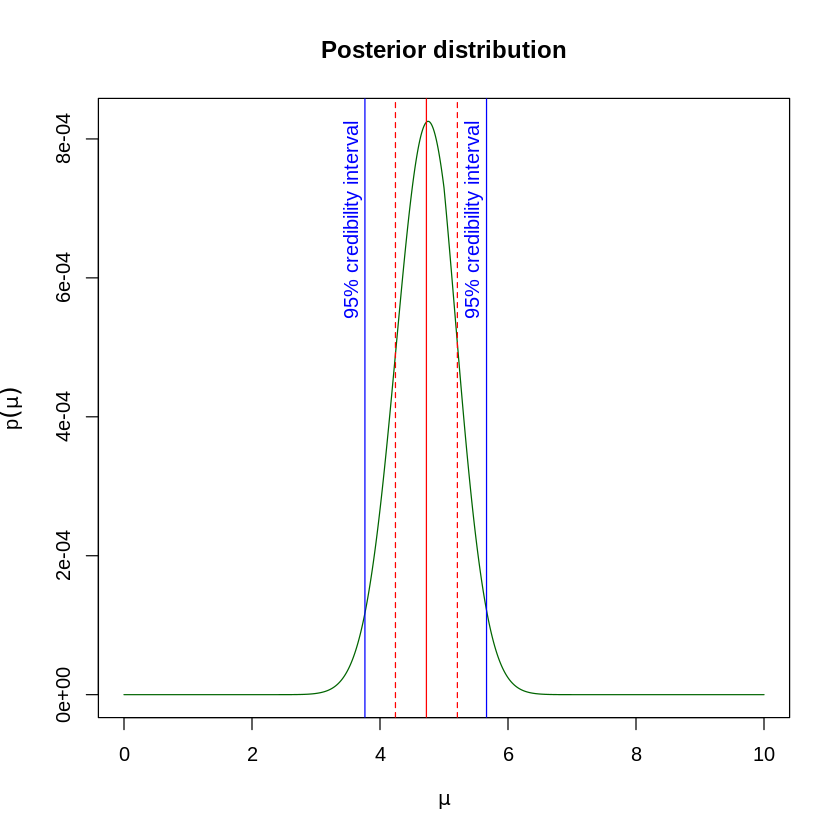

In [24]:
plot(mu, p.post, type='l', xlab=expression(mu), ylab=expression(p(mu)), main="Posterior distribution", col='dark green')
abline(v=mean, col='red',lty=1)
abline(v=mean+sigma, col='red',lty=2)
abline(v=mean-sigma, col='red',lty=2)
abline(v=mu_low , lty=1, col='blue')
abline(v=mu_high , lty=1, col='blue')

text(x=mu_low, y=max(p.post), labels='95% credibility interval', col='blue', pos=2, srt=90)
text(x=mu_high, y=max(p.post), labels='95% credibility interval', col='blue', pos=2, srt=90)

4) Plot, on the same graph, the prior, the likelihood and the posterior distribution.

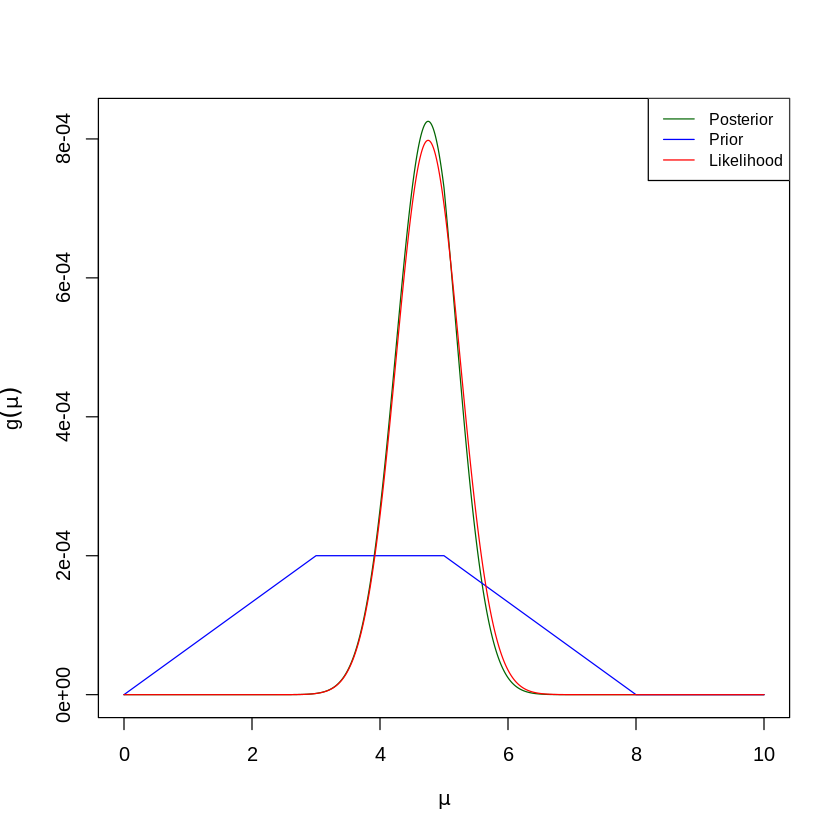

In [25]:
plot(mu, p.post, type='l', xlab=expression(mu), ylab=expression(g(mu)), col='dark green')
lines(mu, prior(mu)/sum(prior(mu)), type='l', col='blue')
lines(mu, likelihood(mu,y,std)/sum(likelihood(mu,y,std)), type='l', col='red')

legend("topright", legend=c("Posterior", "Prior", "Likelihood"), col=c("dark green", "blue", "red"), lty=1, cex=0.8)

## Esercizio 3

Labeling the boxes as follows: H0 H1 H2 H3 H4 H5, write a program in R that:
1) Selects a random box.

In [24]:
n = 50 # number of trials 
N = 6 # number of boxes
box = sample(0:(N-1), 1) # selected box
cat(sprintf("Selected box: H%0.f", box))

Selected box: H1

2) Makes random sampling from the box.

In [25]:
stones = rbinom(n, 1, box/(N-1)) # extraction of a stone with the probability of extracting a white stone given the selected box

3) Prints on the standard output the probability of selecting each box.

In [28]:
p = matrix(nrow=n, ncol=N) # matrix to store the updated probabilities at each extraction
p[1,] = rep(1/N, N) # at first the prior is uniform 

for (i in 2:n) {
    for (j in 0:(N-1)) {
        # calculating the likelihood for each box based on the stone extracted
        if (stones[i]==1) {
            likelihood = j/5}
        else {
            likelihood = (5-j)/5}
        # updating the posterior probability 
        p[i,j+1] = p[i-1,j+1] * likelihood} # posterior = prior x likelihood
    # normalization 
    p[i,] = p[i,] / sum(p[i,])
}    

prob = data.frame(p)
colnames(prob) = c('H0', 'H1', 'H2', 'H3', 'H4', 'H5') 
print(prob)

          H0           H1         H2         H3           H4        H5
1  0.1666667 1.666667e-01 0.16666667 0.16666667 0.1666666667 0.1666667
2  0.3333333 2.666667e-01 0.20000000 0.13333333 0.0666666667 0.0000000
3  0.4545455 2.909091e-01 0.16363636 0.07272727 0.0181818182 0.0000000
4  0.5555556 2.844444e-01 0.12000000 0.03555556 0.0044444444 0.0000000
5  0.6384065 2.614913e-01 0.08273749 0.01634321 0.0010214505 0.0000000
6  0.0000000 5.446809e-01 0.34468085 0.10212766 0.0085106383 0.0000000
7  0.0000000 6.360248e-01 0.30186335 0.05962733 0.0024844720 0.0000000
8  0.0000000 7.123478e-01 0.25356522 0.03339130 0.0006956522 0.0000000
9  0.0000000 5.386639e-01 0.38348238 0.07574961 0.0021041557 0.0000000
10 0.0000000 6.229658e-01 0.33262357 0.04380228 0.0006083650 0.0000000
11 0.0000000 6.964506e-01 0.27889479 0.02448459 0.0001700319 0.0000000
12 0.0000000 5.242880e-01 0.41990400 0.05529600 0.0005120000 0.0000000
13 0.0000000 3.422174e-01 0.54816610 0.10827972 0.0013367867 0.0000000
14 0.0

4) Plots the probability for each box as a function of the number of trial.

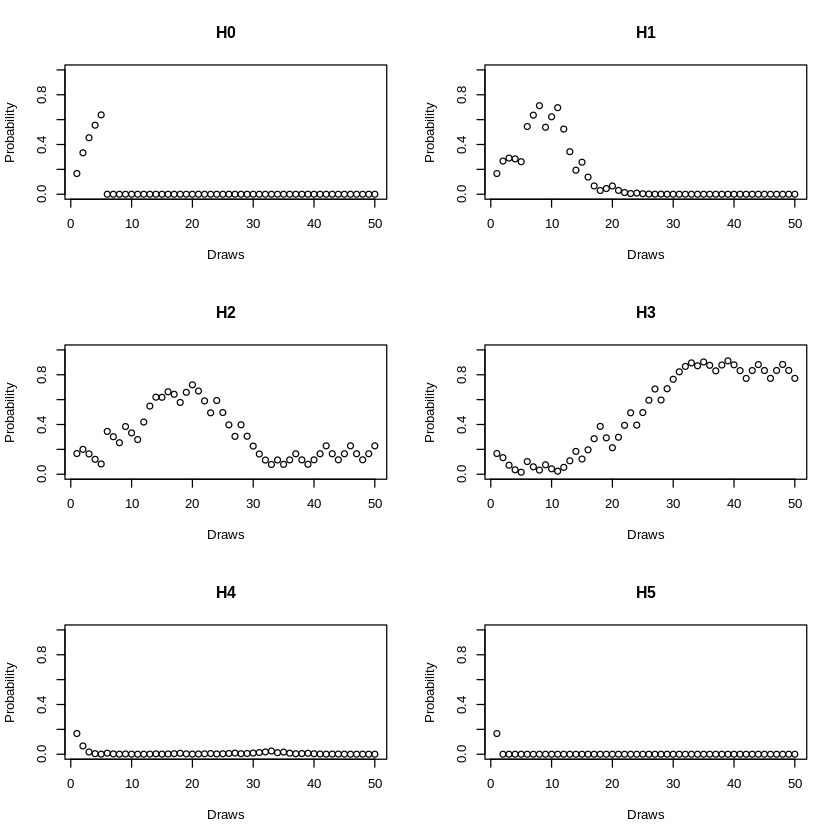

In [30]:
par(mfrow = c(3, 2))
for(i in 1:N){
    plot(1:n , prob[,i],xlab = "Draws", ylab = "Probability", main = paste0("H", i-1), ylim=c(0,1))}